### **. Ensamble Methods:**

In [1]:
import pandas as pd
import numpy as np

input_path = 'dataset/cleaned_train.csv'
input_csv = pd.read_csv(input_path)

train = input_csv.drop(columns='sii')
y = input_csv['sii']

train.shape, y.shape

((1491, 13), (1491,))

In [2]:
train.head()

,Basic_Demos-Age,CGAS-CGAS_Score,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_PU,FGC-FGC_SRR,BIA-BIA_DEE,SDS-SDS_Total_Raw,PreInt_EduHx-computerinternet_hoursday
0,5.0,51.0,46.0,51.0,67.0,85.0,110.0,0.00,0.0,6.00,1492.0,41.0,3.0
1,9.0,62.0,48.0,46.0,75.0,70.0,122.0,3.00,5.0,13.75,1499.0,46.0,0.0
2,9.0,71.0,56.0,82.0,60.0,97.0,117.0,22.50,5.0,7.00,1923.0,31.0,0.0
3,13.0,50.0,60.0,112.0,60.0,73.0,102.0,12.00,6.0,13.75,1996.0,40.0,0.0
4,10.0,65.0,55.0,85.0,123.0,83.0,163.0,11.25,2.0,13.75,1817.0,27.0,3.0


 - Primi modelli basilari: Bagging, Boosting, Random Forest. Prendiamo il base model che meglio performa ed eseguiamo tuning dei parametri

In [32]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
import warnings

X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.25, random_state=0)

In [4]:
# give me three models: Bagging, Boosting and Random Forest

warnings.filterwarnings('ignore')
models = {
    'Bagging': BaggingClassifier(),
    'Boosting': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train) 
    acc_score  = accuracy_score(y_val, model.predict(X_val))
    cross_vals = cross_val_score(model, train, y, cv=5).mean()
    print(f'{name} Cross Val Score: {np.mean(cross_vals)},  Accuracy Score: {acc_score}')


Bagging Cross Val Score: 0.598260420641512,  Accuracy Score: 0.6058981233243967
Boosting Cross Val Score: 0.6130187874570716,  Accuracy Score: 0.6353887399463807
Random Forest Cross Val Score: 0.6170456330946555,  Accuracy Score: 0.6621983914209115


In [5]:
# values results are very similar between the three models. RandomForest is Bagging based
# Given that Im going to use RandomForest with fully grown trees
# then I will try with lower variance Boosting models

**. Tune The HyperParamethers For The Random Forest**

In [6]:
# utility variables
_l_bound = 20
_u_bound = 80

i = _l_bound
b_acc_score      = 0
b_cross_score    = 0
best_t_acc       = i
best_t_cross     = i

In [7]:
def reset_variables_number_estimators():
    global b_acc_score, b_cross_score, best_t_acc, best_t_cross, i
    i = _l_bound
    b_acc_score      = 0
    b_cross_score    = 0
    best_t_acc       = i
    best_t_cross     = i

In [8]:
# Let's Tune the number of estimators:
reset_variables_number_estimators()

for t in range(_l_bound, _u_bound):
    model = RandomForestClassifier(n_estimators=t, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc_score = accuracy_score(y_val, y_pred)
    cross_vals = cross_val_score(model, train, y, cv=5).mean()

    print ("t: {:2d} | Accuracy {:.3f}".format(t,acc_score), " | Cross validation score {:.3f}".format(cross_vals))

    if acc_score > b_acc_score:
        b_acc_score = acc_score
        best_t_acc = i

    if cross_vals > b_cross_score:
        b_cross_score = cross_vals
        best_t_cross = i
    i += 1

print(f'Best Accuracy Score: {b_acc_score} with {best_t_acc} estimators\n Best Cross Val Score: {b_cross_score} with {best_t_cross} estimators')

t: 20 | Accuracy 0.641  | Cross validation score 0.612
t: 21 | Accuracy 0.641  | Cross validation score 0.608
t: 22 | Accuracy 0.638  | Cross validation score 0.612
t: 23 | Accuracy 0.646  | Cross validation score 0.610
t: 24 | Accuracy 0.638  | Cross validation score 0.616
t: 25 | Accuracy 0.641  | Cross validation score 0.614
t: 26 | Accuracy 0.641  | Cross validation score 0.618
t: 27 | Accuracy 0.638  | Cross validation score 0.616
t: 28 | Accuracy 0.646  | Cross validation score 0.623
t: 29 | Accuracy 0.651  | Cross validation score 0.621
t: 30 | Accuracy 0.643  | Cross validation score 0.619
t: 31 | Accuracy 0.646  | Cross validation score 0.619
t: 32 | Accuracy 0.643  | Cross validation score 0.618
t: 33 | Accuracy 0.660  | Cross validation score 0.621
t: 34 | Accuracy 0.662  | Cross validation score 0.618
t: 35 | Accuracy 0.660  | Cross validation score 0.618
t: 36 | Accuracy 0.668  | Cross validation score 0.621
t: 37 | Accuracy 0.660  | Cross validation score 0.624
t: 38 | Ac

In [9]:
# Lets try with a different split criterion 
# -> entropy
reset_variables_number_estimators()

for t in range(_l_bound, _u_bound):
    model = RandomForestClassifier(n_estimators=t, criterion="entropy", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc_score = accuracy_score(y_val, y_pred)
    cross_vals = cross_val_score(model, train, y, cv=5).mean()

    print ("t: {:2d} | Accuracy {:.3f}".format(t,acc_score), " | Cross validation score {:.3f}".format(cross_vals))

    if acc_score > b_acc_score:
        b_acc_score = acc_score
        best_t_acc = i

    if cross_vals > b_cross_score:
        b_cross_score = cross_vals
        best_t_cross = i
    i += 1

print(f'Best Accuracy Score: {b_acc_score} with {best_t_acc} estimators\n Best Cross Val Score: {b_cross_score} with {best_t_cross} estimators')

t: 20 | Accuracy 0.662  | Cross validation score 0.621
t: 21 | Accuracy 0.665  | Cross validation score 0.620
t: 22 | Accuracy 0.678  | Cross validation score 0.612
t: 23 | Accuracy 0.668  | Cross validation score 0.619
t: 24 | Accuracy 0.668  | Cross validation score 0.613
t: 25 | Accuracy 0.670  | Cross validation score 0.619
t: 26 | Accuracy 0.676  | Cross validation score 0.616
t: 27 | Accuracy 0.668  | Cross validation score 0.614
t: 28 | Accuracy 0.668  | Cross validation score 0.612
t: 29 | Accuracy 0.670  | Cross validation score 0.616
t: 30 | Accuracy 0.670  | Cross validation score 0.616
t: 31 | Accuracy 0.676  | Cross validation score 0.620
t: 32 | Accuracy 0.665  | Cross validation score 0.616
t: 33 | Accuracy 0.686  | Cross validation score 0.614
t: 34 | Accuracy 0.689  | Cross validation score 0.621
t: 35 | Accuracy 0.684  | Cross validation score 0.618
t: 36 | Accuracy 0.670  | Cross validation score 0.623
t: 37 | Accuracy 0.668  | Cross validation score 0.618
t: 38 | Ac

In [10]:
# -> log_loss
reset_variables_number_estimators()

for t in range(_l_bound, _u_bound):
    model = RandomForestClassifier(n_estimators=t, criterion="log_loss", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc_score = accuracy_score(y_val, y_pred)
    cross_vals = cross_val_score(model, train, y, cv=5).mean()

    print ("t: {:2d} | Accuracy {:.3f}".format(t,acc_score), " | Cross validation score {:.3f}".format(cross_vals))

    if acc_score > b_acc_score:
        b_acc_score = acc_score
        best_t_acc = i

    if cross_vals > b_cross_score:
        b_cross_score = cross_vals
        best_t_cross = i
    i += 1

print(f'Best Accuracy Score: {b_acc_score} with {best_t_acc} estimators\n Best Cross Val Score: {b_cross_score} with {best_t_cross} estimators')

t: 20 | Accuracy 0.662  | Cross validation score 0.621
t: 21 | Accuracy 0.665  | Cross validation score 0.620
t: 22 | Accuracy 0.678  | Cross validation score 0.612
t: 23 | Accuracy 0.668  | Cross validation score 0.619
t: 24 | Accuracy 0.668  | Cross validation score 0.613
t: 25 | Accuracy 0.670  | Cross validation score 0.619
t: 26 | Accuracy 0.676  | Cross validation score 0.616
t: 27 | Accuracy 0.668  | Cross validation score 0.614
t: 28 | Accuracy 0.668  | Cross validation score 0.612
t: 29 | Accuracy 0.670  | Cross validation score 0.616
t: 30 | Accuracy 0.670  | Cross validation score 0.616
t: 31 | Accuracy 0.676  | Cross validation score 0.620
t: 32 | Accuracy 0.665  | Cross validation score 0.616
t: 33 | Accuracy 0.686  | Cross validation score 0.614
t: 34 | Accuracy 0.689  | Cross validation score 0.621
t: 35 | Accuracy 0.684  | Cross validation score 0.618
t: 36 | Accuracy 0.670  | Cross validation score 0.623
t: 37 | Accuracy 0.668  | Cross validation score 0.618
t: 38 | Ac

In [11]:
# assume entropy and change the max_features to log(2)
reset_variables_number_estimators()

for t in range(_l_bound, _u_bound):
    model = RandomForestClassifier(n_estimators=t, criterion="entropy", max_features="log2", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc_score = accuracy_score(y_val, y_pred)
    cross_vals = cross_val_score(model, train, y, cv=5).mean()

    print ("t: {:2d} | Accuracy {:.3f}".format(t,acc_score), " | Cross validation score {:.3f}".format(cross_vals))

    if acc_score > b_acc_score:
        b_acc_score = acc_score
        best_t_acc = i

    if cross_vals > b_cross_score:
        b_cross_score = cross_vals
        best_t_cross = i
    i += 1

print(f'Best Accuracy Score: {b_acc_score} with {best_t_acc} estimators\n Best Cross Val Score: {b_cross_score} with {best_t_cross} estimators')

t: 20 | Accuracy 0.662  | Cross validation score 0.621
t: 21 | Accuracy 0.665  | Cross validation score 0.620
t: 22 | Accuracy 0.678  | Cross validation score 0.612
t: 23 | Accuracy 0.668  | Cross validation score 0.619
t: 24 | Accuracy 0.668  | Cross validation score 0.613
t: 25 | Accuracy 0.670  | Cross validation score 0.619
t: 26 | Accuracy 0.676  | Cross validation score 0.616
t: 27 | Accuracy 0.668  | Cross validation score 0.614
t: 28 | Accuracy 0.668  | Cross validation score 0.612
t: 29 | Accuracy 0.670  | Cross validation score 0.616
t: 30 | Accuracy 0.670  | Cross validation score 0.616
t: 31 | Accuracy 0.676  | Cross validation score 0.620
t: 32 | Accuracy 0.665  | Cross validation score 0.616
t: 33 | Accuracy 0.686  | Cross validation score 0.614
t: 34 | Accuracy 0.689  | Cross validation score 0.621
t: 35 | Accuracy 0.684  | Cross validation score 0.618
t: 36 | Accuracy 0.670  | Cross validation score 0.623
t: 37 | Accuracy 0.668  | Cross validation score 0.618
t: 38 | Ac

In [12]:
lower_bound = 2
upper_bound = 100

i = lower_bound
best_depth_acc_score = -1
best_depth_cross_score = -1
best_depth_acc = i
best_depth_cross = i

In [13]:
def reset_variables_depth():
    global best_depth_acc_score, best_depth_cross_score, best_depth_acc, best_depth_cross, i
    i = lower_bound
    best_depth_acc_score = 0
    best_depth_cross_score = 0
    best_depth_acc = i
    best_depth_cross = i

In [14]:
# entropy and log_loss are a bit better at least in the top value scores. assume entropy
# log2 or sqrt seems equals. I will use default sqrt
# I will use entropy and I will define the specific number of estimators (last best_t_acc computed) 
# such that I can try to tune other paramethers (max_depth)
reset_variables_depth()

for t in range(lower_bound, upper_bound):
    model = RandomForestClassifier(n_estimators = best_t_acc, max_depth = t, criterion="entropy", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc_score = accuracy_score(y_val, y_pred)
    cross_vals = cross_val_score(model, train, y, cv=5).mean()

    print ("t: {:2d} | Accuracy {:.3f}".format(t, acc_score), " | Cross validation score {:.3f}".format(cross_vals))

    if acc_score > best_depth_acc_score:
        best_depth_acc_score = acc_score
        best_depth_acc = i

    if cross_vals > best_depth_cross_score:
        best_depth_cross_score = cross_vals
        best_depth_cross = i
    i += 1

print(f'Best Accuracy Score: {b_acc_score} with {best_t_acc} estimators\n Best Cross Val Score: {b_cross_score} with {best_t_cross} estimators')

t:  2 | Accuracy 0.633  | Cross validation score 0.607
t:  3 | Accuracy 0.651  | Cross validation score 0.618
t:  4 | Accuracy 0.657  | Cross validation score 0.617
t:  5 | Accuracy 0.649  | Cross validation score 0.626
t:  6 | Accuracy 0.651  | Cross validation score 0.624
t:  7 | Accuracy 0.662  | Cross validation score 0.623
t:  8 | Accuracy 0.665  | Cross validation score 0.628
t:  9 | Accuracy 0.654  | Cross validation score 0.628
t: 10 | Accuracy 0.660  | Cross validation score 0.627
t: 11 | Accuracy 0.654  | Cross validation score 0.619
t: 12 | Accuracy 0.630  | Cross validation score 0.613
t: 13 | Accuracy 0.635  | Cross validation score 0.620
t: 14 | Accuracy 0.651  | Cross validation score 0.614
t: 15 | Accuracy 0.651  | Cross validation score 0.618
t: 16 | Accuracy 0.657  | Cross validation score 0.612
t: 17 | Accuracy 0.662  | Cross validation score 0.619
t: 18 | Accuracy 0.673  | Cross validation score 0.622
t: 19 | Accuracy 0.678  | Cross validation score 0.618
t: 20 | Ac

In [15]:
# last step class weight
# let's try to use best_t_acc, best_depth_acc, entropy and sqrt adding to it the class_weight paramether (balanced)

model = RandomForestClassifier(n_estimators = best_t_acc, max_depth = best_depth_acc, criterion="entropy", class_weight="balanced", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
acc_score = accuracy_score(y_val, y_pred)
cross_vals = cross_val_score(model, train, y, cv=5).mean()

print ("Accuracy {:.3f}".format(acc_score), " | Cross validation score {:.3f}".format(cross_vals)) 

Accuracy 0.660  | Cross validation score 0.611


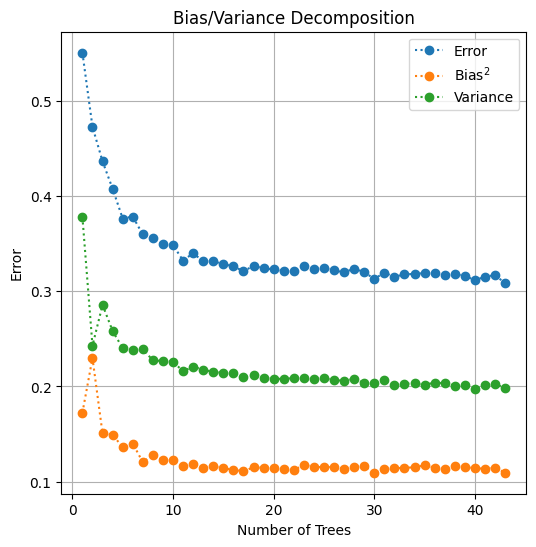

In [40]:
# the model perform worst with class_weight balanced so Im going delete it
# let's check Bias-Variance tradeoff

from matplotlib import pyplot as plt
from sklearn.utils import resample

N_TESTS = 50
stats = np.array([])
top_classification_range = range(1, best_t_acc + 10)


for t in top_classification_range:
    y_preds = np.array([])
    for i in range(N_TESTS):
        X_resampled, y_resampled = resample(X_train, y_train, n_samples=int(0.8*len(y_train)) )
        model_rf = RandomForestClassifier(n_estimators=t, max_depth=best_depth_acc, criterion="entropy", random_state=42)
        model_rf.fit(X_resampled, y_resampled)
        y_pred = model_rf.predict(X_train)
        y_preds = np.column_stack( [y_preds, y_pred] ) if y_preds.size else y_pred


    dt_bias     = (y_train-np.mean(y_preds,axis=1))**2
    dt_variance = np.var(y_preds,axis=1)
    dt_error    = (y_preds - y_train.to_numpy().reshape(-1, 1))**2 #i need the reshape to make it a column vector. To use the 'reshape()' method
                                                                   #i need the object to be a numpy array. Actually it is a Pandas Series so i convert it 

    run_stats = np.array([dt_error.mean(), dt_bias.mean(), dt_variance.mean()])
    stats = np.column_stack([stats, run_stats]) if stats.size else run_stats


    
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(top_classification_range, stats[0,:], 'o:', label='Error')
ax.plot(top_classification_range, stats[1,:], 'o:', label='Bias$^2$')
ax.plot(top_classification_range, stats[2,:], 'o:', label='Variance')
ax.set_title("Bias/Variance Decomposition")
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Error')
ax.grid()
ax.legend()

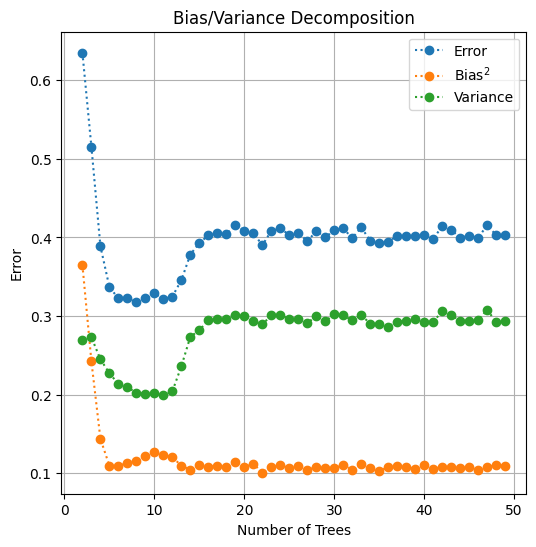

In [ ]:
# Variance is very high. 
# let's try Boosting algorithm with Decision Trees as base estimator in the same number but with less leaves
# and let's check Bias-Variance tradeoff


N_TESTS = 30
stats = np.array([])
top_classification_range = range(2, 50)


for t in top_classification_range:
    y_preds = np.array([])
    for i in range(N_TESTS):
        X_resampled, y_resampled = resample(X_train, y_train, n_samples=int(0.8*len(y_train)) )
        model_ens = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=t), n_estimators=best_t_acc, random_state=42)
        model_ens.fit(X_resampled, y_resampled)
        y_pred = model_ens.predict(X_train)
        y_preds = np.column_stack( [y_preds, y_pred] ) if y_preds.size else y_pred

    dt_bias     = (y_train-np.mean(y_preds,axis=1))**2
    dt_variance = np.var(y_preds,axis=1)
    dt_error    = (y_preds - y_train.to_numpy().reshape(-1, 1))**2 #i need the reshape to make it a column vector. To use the 'reshape()' method
                                                                   #i need the object to be a numpy array. Actually it is a Pandas Series so i convert it 

    run_stats = np.array([dt_error.mean(), dt_bias.mean(), dt_variance.mean()])
    stats = np.column_stack([stats, run_stats]) if stats.size else run_stats

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(top_classification_range, stats[0,:], 'o:', label='Error')
ax.plot(top_classification_range, stats[1,:], 'o:', label='Bias$^2$')
ax.plot(top_classification_range, stats[2,:], 'o:', label='Variance')
ax.set_title("Bias/Variance Decomposition")
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Error')
ax.grid()
ax.legend()

In [19]:
# conclusion model and Gain from base model